<a href="https://colab.research.google.com/github/munas-git/Skin-Cancer-Detection/blob/main/Skin_Cancer_Prediction_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [2]:
! kaggle datasets download -d farjanakabirsamanta/skin-cancer-dataset

100% 2.57G/2.58G [00:24<00:00, 201MB/s]
100% 2.58G/2.58G [00:24<00:00, 114MB/s]


In [8]:
# !unzip \*.zip && rm *.zip

## Importing Important libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout

In [2]:
meta_data = pd.read_csv("/content/HAM10000_metadata.csv")
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
print("Unique Cancer types represented in data.")
meta_data.dx.unique()

Unique Cancer types represented in data.


array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

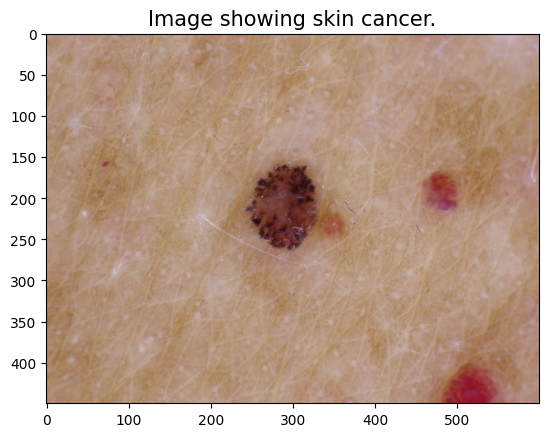

In [4]:
image = "/content/Skin Cancer/Skin Cancer/ISIC_0032258.jpg"
sample_image = cv2.imread(image)[:,:,::-1] # Square brackets corrects image color
plt.title("Image showing skin cancer.", fontsize= 15)
plt.imshow(sample_image);

## Data Preprocessing & Augmentation

In [5]:
images_dir = r"/content/Skin Cancer/Skin Cancer"

X = [] # Dictionary to contain arrays/tensors of images.
Y = [] # Dictionary to contain names of cancer types.

for item in os.scandir(images_dir):

  # Getting name of each individual image.
  image_name = item.name
  # Reading each image tensor and appending it to array X.
  image = cv2.imread(images_dir+"/"+image_name)[:,:,::-1]
  X.append(image)
  # Getting corresponding cancer type from meta_data and appending to Y.
  cancer_type = meta_data.dx[meta_data.image_id == image_name.split(".")[0]]
  Y.append(cancer_type)

In [ ]:
# Converting X array to numpy array in otder to normalize values.
#  and transforming Y to integers using label encoder.

enc = preprocessing.LabelEncoder()
X = np.array(X) / 225.0
Y = enc.fit_transform(Y)

In [ ]:
print(len(X))
print(len(Y))